Example notebook to recreate Fig. 11 (comparison of absolute magnitudes between our calibrated TFR and Cosmicflows-4's calibrated TFR) for the EDR TF paper.

In [1]:
import numpy as np

from astropy.io import fits

import matplotlib.pyplot as plt

# Data

In [6]:
hdul = fits.open('fig11_data.fits')

hdr = hdul[0].header
gals = hdul[1].data

hdul.close()

In [3]:
dwarf_boolean = gals['DWARF']

# Plot

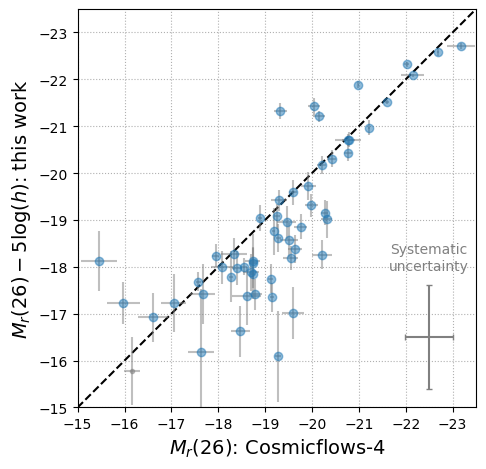

In [7]:
plt.figure(tight_layout=True)

plt.grid(ls=':')

plt.plot([-5, -28], [-5, -28], '--', color='k')

plt.errorbar(gals['R_ABSMAG_CF4'][~dwarf_boolean], gals['R_ABSMAG_DESI'][~dwarf_boolean], 
             xerr=gals['R_ABSMAG_CF4_ERR_STAT'][~dwarf_boolean], 
             yerr=gals['R_ABSMAG_DESI_ERR_STAT'][~dwarf_boolean], 
             fmt='o', 
             alpha=0.5, 
             ecolor='gray')
plt.errorbar(gals['R_ABSMAG_CF4'][dwarf_boolean], gals['R_ABSMAG_DESI'][dwarf_boolean], 
             xerr=gals['R_ABSMAG_CF4_ERR_STAT'][dwarf_boolean], 
             yerr=gals['R_ABSMAG_DESI_ERR_STAT'][dwarf_boolean], 
             fmt='.',
             color='gray',
             alpha=0.5, 
             ecolor='gray')

# Systematic error bar example
plt.errorbar([-22.5], [-16.5], 
             xerr=np.sqrt(np.nanmean(gals['R_ABSMAG_CF4_ERR_SYS'])**2 + hdr['SIG_CF4']**2),
             yerr=np.sqrt(np.nanmean(gals['R_ABSMAG_DESI_ERR_SYS'])**2 + hdr['SIG_DESI']**2), 
             ecolor='gray', 
             capsize=2)
plt.annotate('Systematic\nuncertainty', 
             (-22.5, -18.2), 
             va='center',
             ha='center',
             c='gray')

plt.gca().set_aspect('equal')

plt.xlim([-15, -23.5])
plt.ylim([-15, -23.5])

plt.xlabel('$M_r(26)$: Cosmicflows-4', fontsize=14)
plt.ylabel('$M_r(26) - 5\log(h)$: this work', fontsize=14);